# 주제 :
# 목적 :
# 제출처 :

# 붓꽃품종분류기

- 꽃받침(Sepal), 꽃잎(Petal) 각각의 길이와 폭을 이용하여붓꽃의 품종을 출력하여라 

In [3]:
Image(url='https://t1.daumcdn.net/cfile/tistory/996F6F445AF85F1E27')

In [6]:
Image(url='https://t1.daumcdn.net/cfile/tistory/99CB703A5AF85F1F2C')

In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.display import Image

from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 98% !important; }</style>"))


In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.family'] = 'Malgun Gothic'

# 머신러닝 과정 

- 모듈 임포트 
- 데이타 수집 (학습데이타)
- 데이타 전처리 
- 데이터 학습 (모델화)
- 데이터 예측 (테스트데이타)
- 데이터 테스트 (정답률)

In [3]:
# 학습기 모듈 
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [4]:
# 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이타 수집 

- input/iris.csv

In [5]:
# 데이터 가져오기
iris = pd.read_csv('data/iris.csv')
iris.shape

(150, 5)

In [25]:
# 150개 데이터 5컬럼
# 상단 2개 값
iris.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [26]:
iris.Name.unique()
#종 확인 가능

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

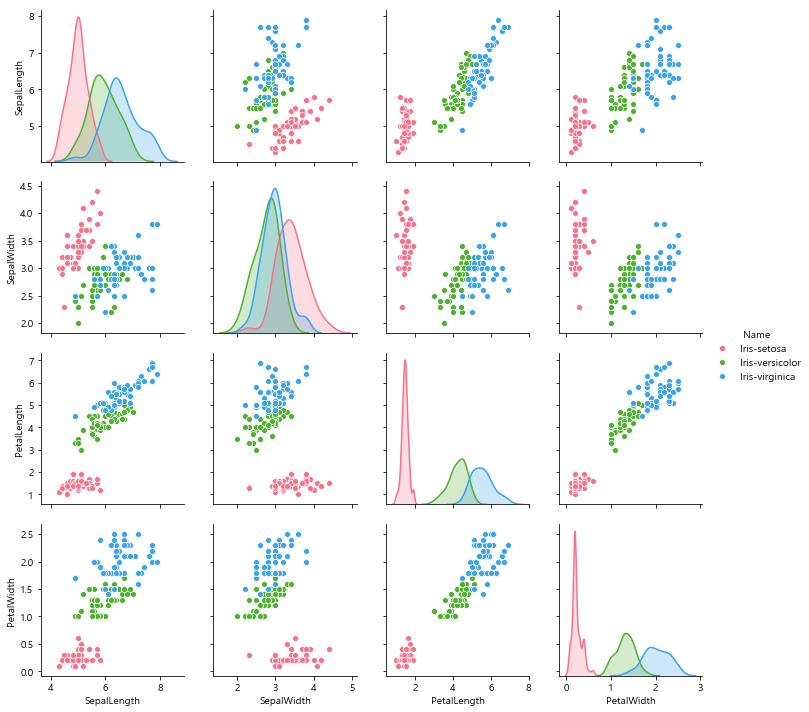

In [8]:
sns.pairplot(iris, hue="Name", palette="husl")

# 데이타 전처리 

In [27]:
# 우선 컬럼 가져오기
iris.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')

In [28]:
x = iris[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']]
y = iris.Name

### 학습 전용과 테스트 전용 분리하기 

- 학습데이터와 데스트 전용 데이터로 분할하는 메서드 
- 임포트 
    - from sklearn.model_selection import train_test_split

```
    train_test_split( data, label, 
                       test_size=float, train_size=float, 
                        shuffle=True/False)
```                    

In [29]:
# 만든 데이터와 정답 데이터로 답이 맞는지 확인
x_train, x_test, y_train, y_test \
        = train_test_split(x,y, test_size=0.23, train_size=0.65, shuffle=True)

In [30]:
# 길이확인
x_train.shape, x_test.shape

((97, 4), (35, 4))

### 데이타 학습  : 모델링

In [31]:
# 학습 모델링 준비 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import  SVC

In [32]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 데이터 예측 

In [33]:
#테스트 데이터로 예측
y_pred = model_svc.predict(x_test)

In [34]:
# 두개 데이터 비교
com = pd.DataFrame([y_test, y_pred])

### 결과 확인 

metrics.accuracy_score(label, clf.predict(data))

In [35]:
#모델평가
print("정답률 = " , accuracy_score(y_test, y_pred))

정답률 =  0.9714285714285714


In [36]:
iris[iris.Name=='Iris-versicolor'].head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [37]:
model_svc.predict([[7.0, 3.2, 4.7, 1.4]])

array(['Iris-versicolor'], dtype=object)

In [38]:
model_kn = KNeighborsClassifier()
model_kn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
kn_y_pred = model_kn.predict(x_test)

In [40]:
print("정답률 = " , accuracy_score(y_test, kn_y_pred))

정답률 =  1.0
